In [49]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from google.colab import drive
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import plotly.graph_objects as go
from sklearn.metrics import adjusted_rand_score
from collections import OrderedDict

In [50]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Arquivos

In [51]:
path = "drive/My Drive/TCC - Vinícius Franklin - Desenvolvimento de Prótese Ativa Controlada por Sinais EMG Utilizando Classificação com Machine Learning/Testes Dados - EMG/conf_3_elet/Features Datasets/"

In [52]:
arquivos_emg = {"EMG_features_dataset.csv":"Clusters_Kmeans",
                "emg__modulo_abre_fecha_5s_1.csvFeatures.csv":"Clusters_Kmeans"
                ,"emg__modulo_abre_fecha_5s_2.csvFeatures.csv":"Clusters_Kmeans",
                "emg__modulo_abre_fecha_5s_3.csvFeatures.csv":"Clusters_Kmeans"
                ,"emg__modulo_abre_fecha_5s_4.csvFeatures.csv":"Clusters_GMM",
                "emg__modulo_abre_fecha_10s_1.csvFeatures.csv":"Clusters_GMM",
                "emg__modulo_abre_fecha_10s_2.csvFeatures.csv":"Clusters_Kmeans",
                "emg__modulo_abre_fecha_10s_3.csvFeatures.csv":"Clusters_GMM",
                "emg__modulo_abre_fecha_10s_4.csvFeatures.csv":"Clusters_GMM",
                'emg__modulo_1_abre_fecha.csvFeatures.csv':"Clusters_GMM",
                'emg__modulo_1_aberta.csv_Features.csv':"Label",
                'emg__modulo_1_aberta_2.csv_Features.csv':"Label",
                'emg__modulo_1_aberta_3.csv_Features.csv':"Label",
                 'emg__modulo_1_fechada.csv_Features.csv':"Label",
                 'emg__modulo_1_fechada_2.csv_Features.csv':"Label",
                'emg__modulo_1_fechada_3.csv_Features.csv':"Label",
                'emg__modulo_1_fechada_forte.csv_Features.csv':"Label",
                "emg__modulo_mov_dedos_esq_dir_5s_1.csvFeatures.csv":"Clusters_Kmeans"
                }


In [53]:

tipo_cluster = list(OrderedDict.fromkeys(arquivos_emg.values()))


df_features_geral = pd.DataFrame()

for arquivo in list(arquivos_emg.keys()):
  df_emg_features = pd.read_csv(path+arquivo)
  colunas = list(df_emg_features.columns)
  cluster = arquivos_emg[arquivo]
  copy_tipo_cluster = tipo_cluster[:]
  copy_tipo_cluster.pop(copy_tipo_cluster.index(cluster))
  for c in copy_tipo_cluster:
    if c in colunas:
      colunas.pop(colunas.index(c))
    else:
      pass
  df_emg_features = df_emg_features[colunas]
  print(f"{arquivo} -> {cluster}")
  df_emg_features.rename(columns={cluster:"Contração"}, inplace=True)
  df_features_geral = pd.concat([df_emg_features,df_features_geral],axis=0,ignore_index=True)



EMG_features_dataset.csv -> Clusters_Kmeans
emg__modulo_abre_fecha_5s_1.csvFeatures.csv -> Clusters_Kmeans
emg__modulo_abre_fecha_5s_2.csvFeatures.csv -> Clusters_Kmeans
emg__modulo_abre_fecha_5s_3.csvFeatures.csv -> Clusters_Kmeans
emg__modulo_abre_fecha_5s_4.csvFeatures.csv -> Clusters_GMM
emg__modulo_abre_fecha_10s_1.csvFeatures.csv -> Clusters_GMM
emg__modulo_abre_fecha_10s_2.csvFeatures.csv -> Clusters_Kmeans
emg__modulo_abre_fecha_10s_3.csvFeatures.csv -> Clusters_GMM
emg__modulo_abre_fecha_10s_4.csvFeatures.csv -> Clusters_GMM
emg__modulo_1_abre_fecha.csvFeatures.csv -> Clusters_GMM
emg__modulo_1_aberta.csv_Features.csv -> Label
emg__modulo_1_aberta_2.csv_Features.csv -> Label
emg__modulo_1_aberta_3.csv_Features.csv -> Label
emg__modulo_1_fechada.csv_Features.csv -> Label
emg__modulo_1_fechada_2.csv_Features.csv -> Label
emg__modulo_1_fechada_3.csv_Features.csv -> Label
emg__modulo_1_fechada_forte.csv_Features.csv -> Label
emg__modulo_mov_dedos_esq_dir_5s_1.csvFeatures.csv -> Cl

In [54]:
df_features_geral.head(5)

,amp_en,rms,zcr,Band Energy Ratio,Spectral Centroid,Bandwidth,f0,Mag_norm_f0,bp_50_150,bp_150_200,...,mdf,mnf,mav,wl,mean_v,std_v,var_v,ssc,mavs,Contração
0,-7.994103,1.348032,0.246823,0.445773,200.769009,133.328825,36.407180,0.353036,0.213543,0.121952,...,152.910157,177.947454,0.840347,711.679486,-0.000001,1.348032,1.817189,439.0,0.825444,0.0
1,-7.201940,1.176004,0.266373,0.532601,209.562032,140.511884,32.038319,0.327990,0.168243,0.163605,...,155.822732,180.474802,0.755185,646.389525,0.000011,1.176004,1.382986,439.0,0.749996,0.0
2,-5.635922,1.205739,0.281036,0.391208,222.965258,141.422200,32.038319,0.267275,0.144597,0.188760,...,151.453870,180.260174,0.745465,632.641726,0.000009,1.205739,1.453808,444.0,0.747640,0.0
3,5.205259,1.135269,0.273216,0.280293,224.383637,138.865933,173.298178,0.258456,0.105896,0.139029,...,157.279019,187.540606,0.725864,628.918757,0.000017,1.135269,1.288836,429.0,0.720023,0.0
4,-7.175559,1.179164,0.276149,0.232537,221.277935,137.458255,107.765254,0.203015,0.106309,0.126882,...,155.822732,175.620905,0.725816,612.459465,0.000004,1.179164,1.390429,433.0,0.731804,0.0


In [55]:
len(df_features_geral)

7425

## Ler Dados

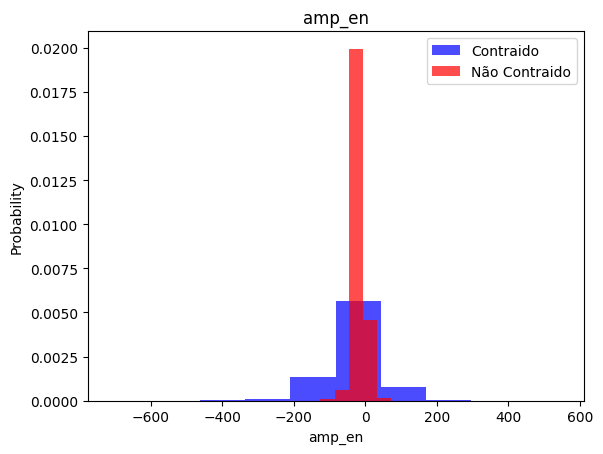

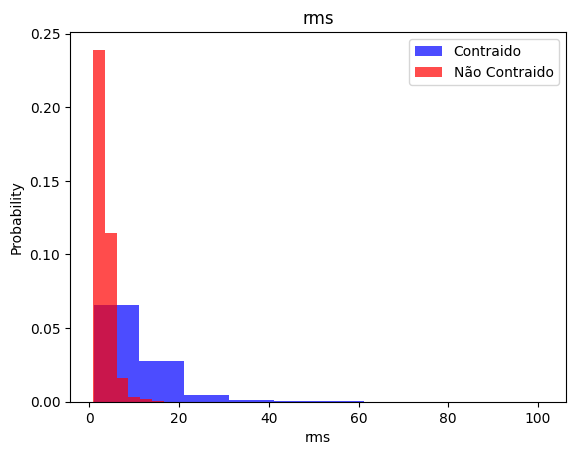

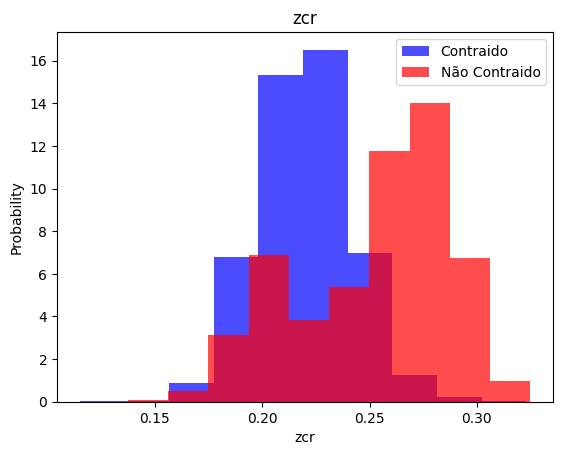

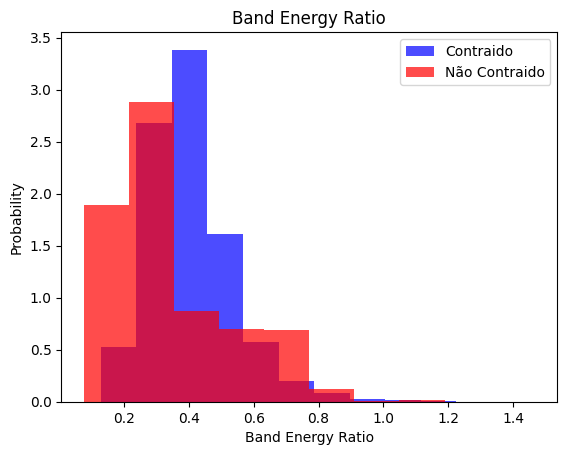

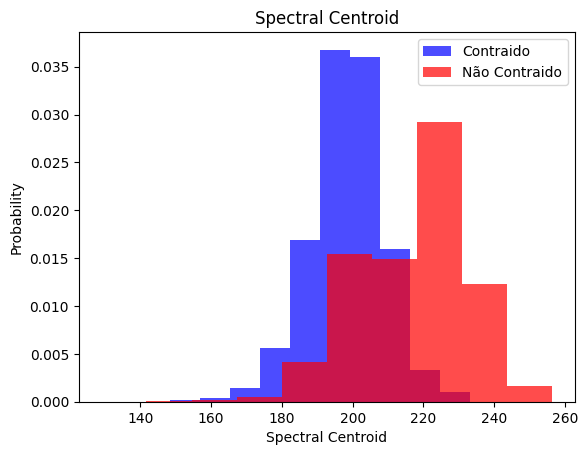

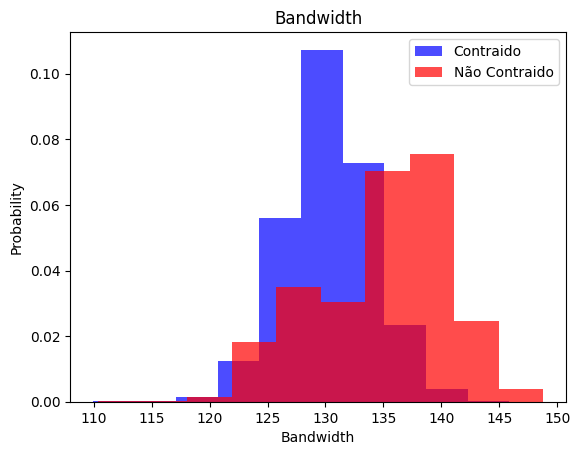

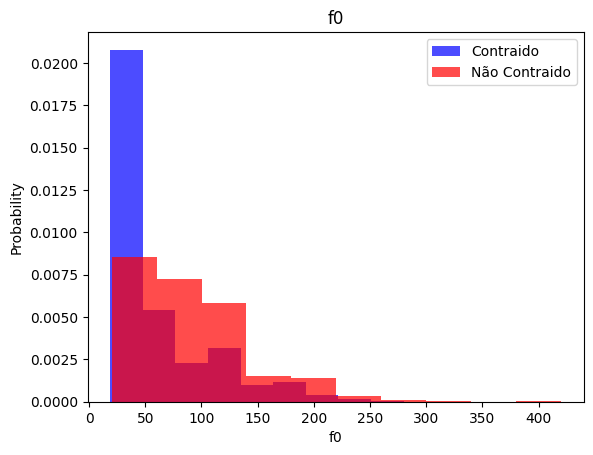

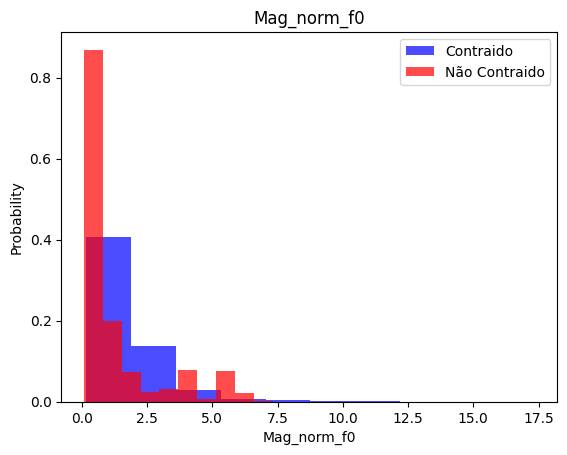

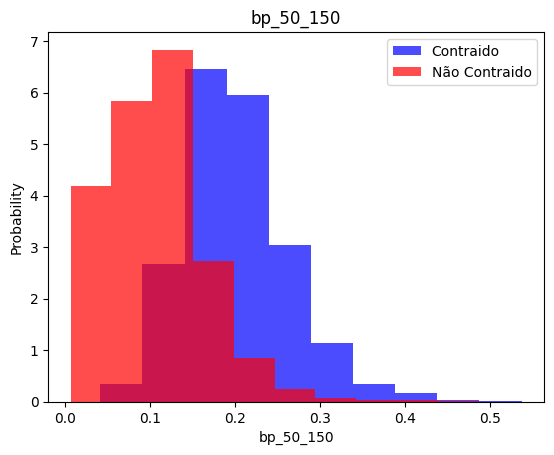

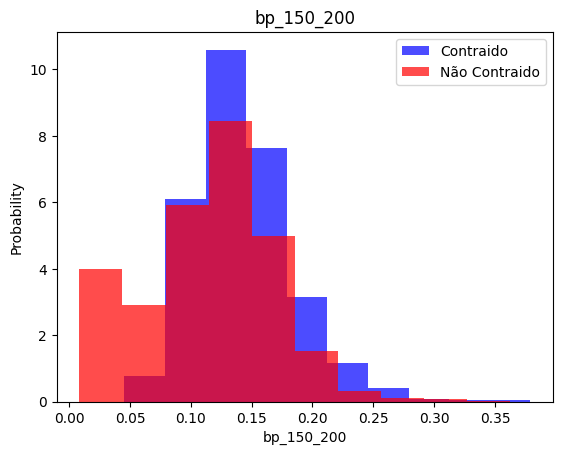

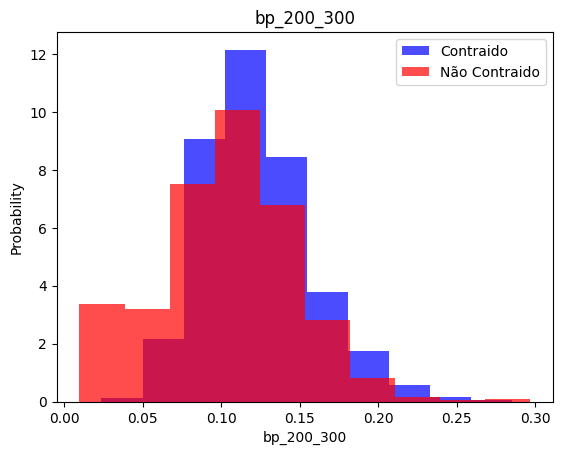

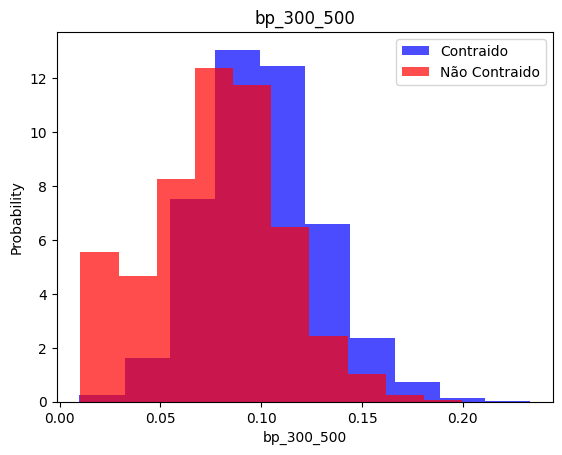

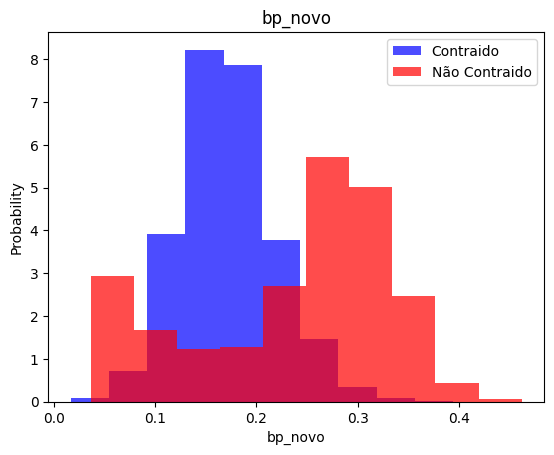

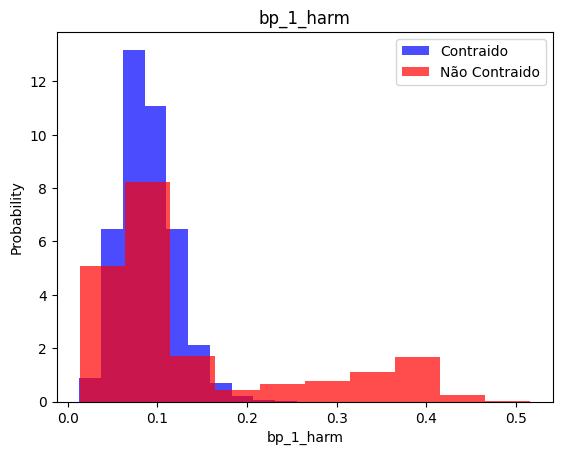

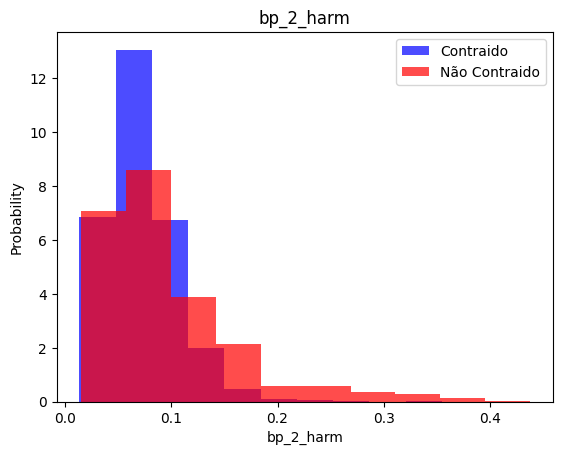

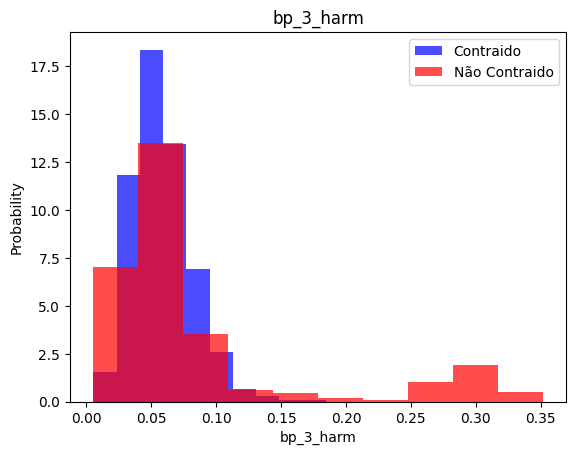

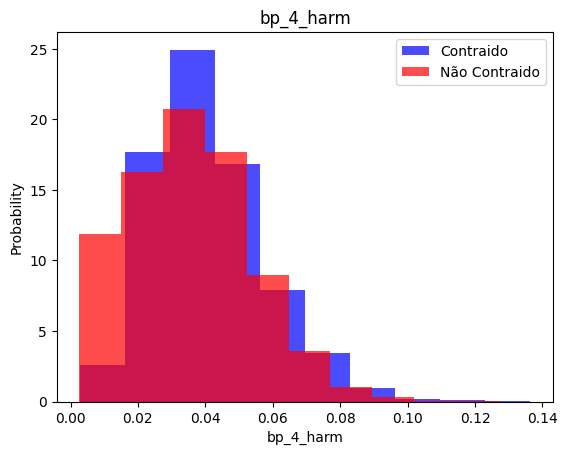

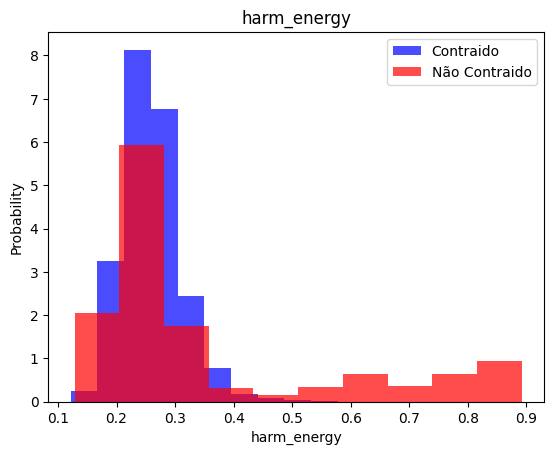

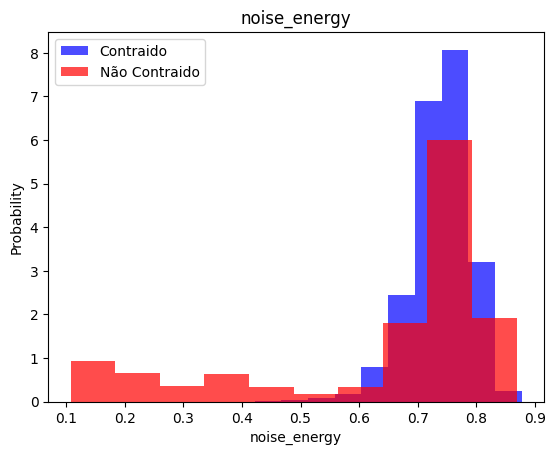

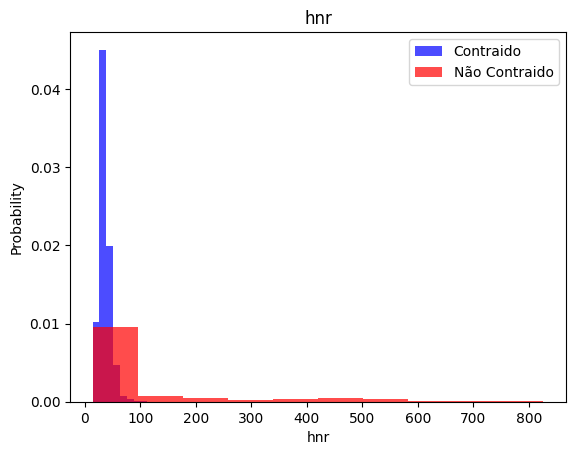

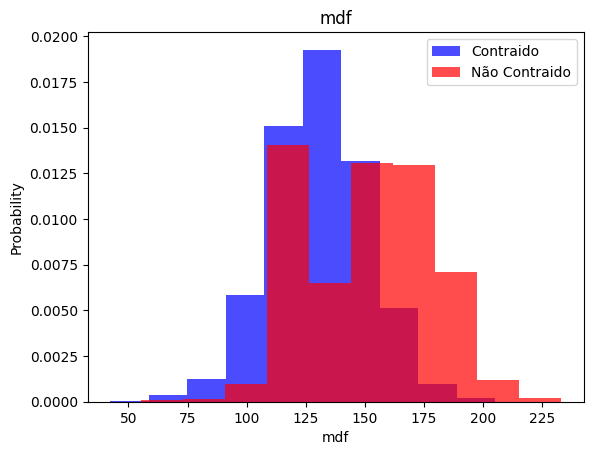

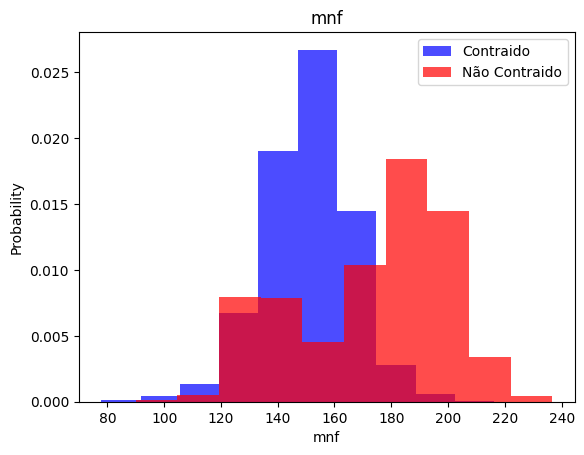

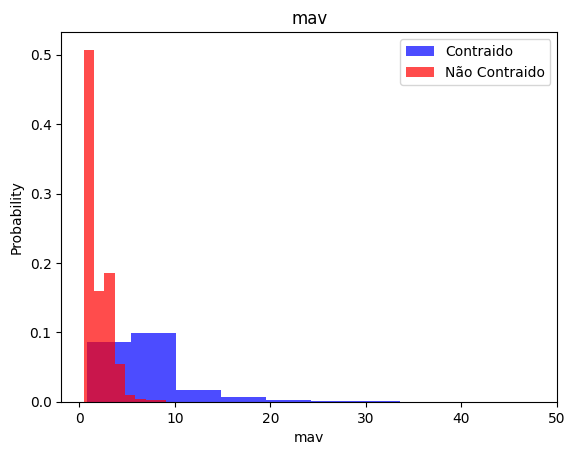

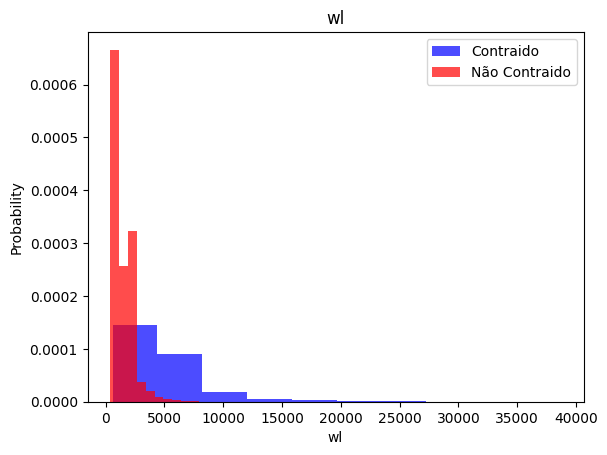

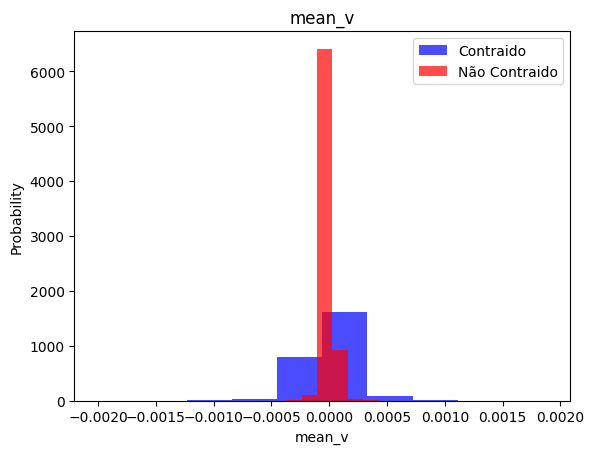

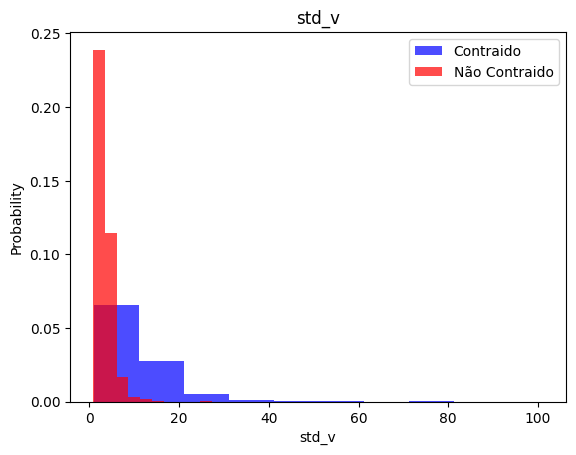

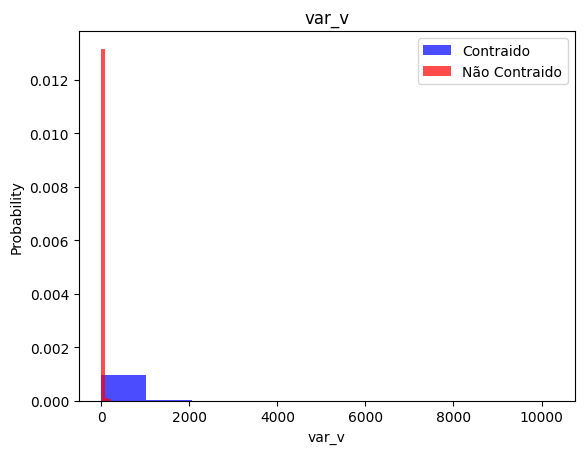

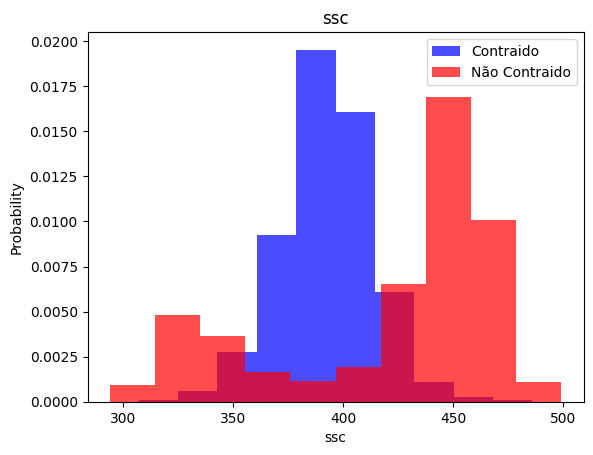

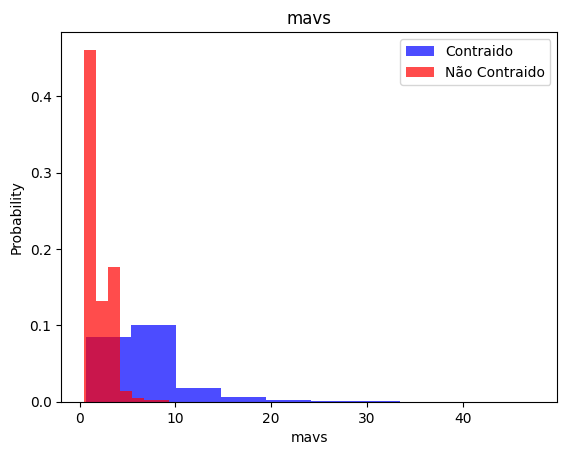

In [56]:
for label in df_features_geral.columns[:-1]:
    plt.hist(df_features_geral[df_features_geral['Contração']==1][label],color='blue',label='Contraido',alpha=0.7,density=True)
    plt.hist(df_features_geral[df_features_geral['Contração']==0][label],color='red',label='Não Contraido',alpha=0.7,density=True)
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

In [57]:
df_features_geral.corr()['Contração']

,Contração
amp_en,-0.349904
rms,0.624911
zcr,-0.488976
Band Energy Ratio,0.189835
Spectral Centroid,-0.574513
Bandwidth,-0.443021
f0,-0.274837
Mag_norm_f0,0.187821
bp_50_150,0.616144
bp_150_200,0.284112


In [58]:

fig = px.imshow(df_features_geral.corr())
fig.show()

## Colunas

In [59]:
df_features_geral.columns

Index(['amp_en', 'rms', 'zcr', 'Band Energy Ratio', 'Spectral Centroid',
       'Bandwidth', 'f0', 'Mag_norm_f0', 'bp_50_150', 'bp_150_200',
       'bp_200_300', 'bp_300_500', 'bp_novo', 'bp_1_harm', 'bp_2_harm',
       'bp_3_harm', 'bp_4_harm', 'harm_energy', 'noise_energy', 'hnr', 'mdf',
       'mnf', 'mav', 'wl', 'mean_v', 'std_v', 'var_v', 'ssc', 'mavs',
       'Contração'],
      dtype='object')

In [60]:
time_features = ['amp_en', 'rms', 'zcr','mav', 'wl',
       'mean_v', 'std_v', 'var_v', 'ssc', 'mavs', 'Contração']

frequency_features = ['Band Energy Ratio', 'Spectral Centroid',
       'Bandwidth', 'f0', 'Mag_norm_f0', 'bp_50_150', 'bp_150_200',
       'bp_200_300', 'bp_300_500', 'bp_1_harm', 'bp_2_harm', 'bp_3_harm',
       'harm_energy', 'noise_energy', 'hnr', 'mdf', 'mnf','Contração']

In [61]:
df_features_geral = df_features_geral[:]

## Train Test Split

In [62]:
cont = len(df_features_geral[df_features_geral["Contração"] == 1])
n_cont = len(df_features_geral[df_features_geral["Contração"] == 0])

print(f"Distribuição do Dataset: \nContraído: {cont}\nNão Contraído {n_cont}")

Distribuição do Dataset: 
Contraído: 3796
Não Contraído 3629


In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    df_features_geral[df_features_geral.columns[:-1]],  # todas as colunas exceto a última → features
    df_features_geral[df_features_geral.columns[-1]],   # última coluna → labels
    test_size=0.80,
    random_state=42
)


## Scale Data

$$
X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$


$$
X_{\text{scaled}} = X_{\text{std}} \times (b - a) + a
$$

onde

$$
X_{\text{std}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$



A aplicação do numpy para a função criada para min max scaler, representa a isso em algebra linear:
$$
X_{\text{scaled}} = \frac{X - \mathbf{1}_n \min^T}{\mathbf{1}_n (\max - \min)^T}
$$


In [64]:
def min_max_scaler(X, max_values, min_values):
    # aplica o min-max manualmente com base nos valores de treino
    # verificando o resultado da certinho igual ao MinMaxScaler
    X_scaled = (X - min_values) / (max_values - min_values)
    return X_scaled

def scale_dataset(X, y, oversample=False, Train=False, max_values=None, min_values=None):
    if Train:
        # calcula os valores max e min para cada coluna (feature)
        max_values = np.max(X, axis=0)
        min_values = np.min(X, axis=0)

        # aplica MinMaxScaler do sklearn (equivalente à fórmula acima)
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)

        # opcional: oversampling
        if oversample:
            ros = RandomOverSampler()
            X_scaled, y = ros.fit_resample(X_scaled, y)

        df = np.hstack((X_scaled, np.reshape(y, (-1, 1))))

        X_scaled, y = shuffle(X_scaled, y, random_state=42)


        return df, X_scaled, y, max_values, min_values

    else:
        # normaliza o conjunto de teste usando os valores do treino
        X_scaled = min_max_scaler(X, max_values, min_values)

        if oversample:
            ros = RandomOverSampler()
            X_scaled, y = ros.fit_resample(X_scaled, y)

        df = np.hstack((X_scaled, np.reshape(y, (-1, 1))))

        X_scaled, y = shuffle(X_scaled, y, random_state=42)


        return df, X_scaled, y


In [65]:
train, X_train_array, y_train_array, max_values, min_values = scale_dataset(
    X=X_train.values, y=y_train.values, oversample=True, Train=True
)

test, X_test_array, y_test_array = scale_dataset(
    X=X_test.values, y=y_test.values, oversample=False,
    max_values=max_values, min_values=min_values
)


In [66]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Exemplo simples (você pode trocar pelo seu X_train.values)
X = X_train.values

# --- Seu algoritmo manual ---
max_values = np.max(X, axis=0)
min_values = np.min(X, axis=0)
X_manual = (X - min_values) / (max_values - min_values)

# --- Scikit-learn ---
scaler = MinMaxScaler()
X_sklearn = scaler.fit_transform(X)

# --- Comparação ---
print("Manual:")
print(X_manual)
print("\nSklearn:")
print(X_sklearn)

# Diferença absoluta média
diff = np.abs(X_manual - X_sklearn)
print("\nDiferença média:", np.mean(diff))

# Teste booleano (se são praticamente iguais)
print("São iguais (dentro da tolerância numérica)?", np.allclose(X_manual, X_sklearn))


Manual:
[[3.78681032e-01 1.37494166e-01 5.05050505e-01 ... 2.11520672e-02
  6.20689655e-01 1.39663584e-01]
 [4.38598985e-01 1.20685742e-02 7.52525253e-01 ... 3.71604966e-04
  7.53694581e-01 1.21036403e-02]
 [3.27405491e-01 1.54798457e-01 3.33333333e-01 ... 2.64420679e-02
  4.38423645e-01 1.45315802e-01]
 ...
 [4.43020341e-01 7.70577502e-03 6.46464646e-01 ... 2.04287844e-04
  6.05911330e-01 8.70122592e-03]
 [4.16130363e-01 6.77041750e-02 3.78787879e-01 ... 5.78006520e-03
  4.67980296e-01 6.70491136e-02]
 [0.00000000e+00 9.18430225e-01 4.54545455e-01 ... 8.44933834e-01
  5.02463054e-01 9.10539291e-01]]

Sklearn:
[[3.78681032e-01 1.37494166e-01 5.05050505e-01 ... 2.11520672e-02
  6.20689655e-01 1.39663584e-01]
 [4.38598985e-01 1.20685742e-02 7.52525253e-01 ... 3.71604966e-04
  7.53694581e-01 1.21036403e-02]
 [3.27405491e-01 1.54798457e-01 3.33333333e-01 ... 2.64420679e-02
  4.38423645e-01 1.45315802e-01]
 ...
 [4.43020341e-01 7.70577502e-03 6.46464646e-01 ... 2.04287844e-04
  6.05911330e-

In [67]:
len(y_train)

1485

In [68]:
len(y_test)

5940

In [69]:
sum(y_train == 0)

759

In [70]:
sum(y_train==1)

726

# Modelos - Treino

## KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [72]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_array,y_train_array)
#use the knn model to try to predict the test dataset
y_pred_array = knn_model.predict(X_test_array)
print(classification_report(y_test_array,y_pred_array))

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      2870
         1.0       0.93      0.98      0.96      3070

    accuracy                           0.95      5940
   macro avg       0.95      0.95      0.95      5940
weighted avg       0.95      0.95      0.95      5940



## Naive Bayes

In [73]:
from sklearn.naive_bayes import GaussianNB

In [74]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train_array,y_train_array)
y_pred = nb_model.predict(X_test_array)
print(classification_report(y_test_array,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      2870
         1.0       0.95      0.95      0.95      3070

    accuracy                           0.95      5940
   macro avg       0.95      0.95      0.95      5940
weighted avg       0.95      0.95      0.95      5940



##Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
# unsing the standard function
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train_array,y_train_array)
y_pred = lg_model.predict(X_test_array)
print(classification_report(y_test_array,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95      2870
         1.0       0.94      0.97      0.95      3070

    accuracy                           0.95      5940
   macro avg       0.95      0.95      0.95      5940
weighted avg       0.95      0.95      0.95      5940



## SVM

In [77]:
from sklearn.svm import SVC

In [78]:
svm_model = SVC()
svm_model = svm_model.fit(X_train_array,y_train_array)
y_pred = svm_model.predict(X_test_array)
print(classification_report(y_test_array,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.96      2870
         1.0       0.94      0.98      0.96      3070

    accuracy                           0.96      5940
   macro avg       0.96      0.96      0.96      5940
weighted avg       0.96      0.96      0.96      5940



## Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_array,y_train_array)
y_pred_dtc = dtc.predict(X_test_array)
print(f"Decision Tree Classification: \n{classification_report(y_test_array,y_pred_dtc)}")


Decision Tree Classification: 
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      2870
         1.0       0.94      0.94      0.94      3070

    accuracy                           0.93      5940
   macro avg       0.93      0.93      0.93      5940
weighted avg       0.93      0.93      0.93      5940



## Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rfc = RandomForestClassifier()
rfc.fit(X_train_array,y_train_array)

y_pred_rfc = rfc.predict(X_test_array)
print(f'Random Forest Classification: \n{classification_report(y_test_array,y_pred_rfc)}')

Random Forest Classification: 
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      2870
         1.0       0.95      0.97      0.96      3070

    accuracy                           0.96      5940
   macro avg       0.96      0.96      0.96      5940
weighted avg       0.96      0.96      0.96      5940



# Otimizar Features

In [83]:
# https://towardsdatascience.com/best-practice-to-calculate-and-interpret-model-feature-importance-14f0e11ee660/
# https://www.geeksforgeeks.org/machine-learning/machine-learning-explainability-using-permutation-importance/
#  Inclui análise de interpretabilidade – Mostrar pesos e importâncias das features (via Random Forest, SHAP ou Permutation Importance)
# é um diferencial, pois não só apresenta resultados, mas explica o “porquê” do desempenho.

In [84]:
#from sklearn.inspection import permutation_importance
##calculate permutation importance for test data
#result_test = permutation_importance(
#    knn_model, X_test_array, y_test_array, n_repeats=20, random_state=42, n_jobs=2
#)
#
#sorted_importances_idx_test = result_test.importances_mean.argsort()
#importances_test = pd.DataFrame(
#    result_test.importances[sorted_importances_idx_test].T,
#    columns=X_train.columns[sorted_importances_idx_test],
#)
#
##calculate permutation importance for training data
#result_train = permutation_importance(
#    knn_model, X_train_array, y_train_array, n_repeats=20, random_state=42, n_jobs=2
#)
#
#sorted_importances_idx_train = result_train.importances_mean.argsort()
#importances_train = pd.DataFrame(
#    result_train.importances[sorted_importances_idx_train].T,
#    columns=X_train.columns[sorted_importances_idx_train],
#)
#
#f, axs = plt.subplots(1,2,figsize=(15,5))
#
#importances_test.plot.box(vert=False, whis=10, ax = axs[0])
#axs[0].set_title("Permutation Importances (test set)")
#axs[0].axvline(x=0, color="k", linestyle="--")
#axs[0].set_xlabel("Decrease in accuracy score")
#axs[0].figure.tight_layout()
#
#importances_train.plot.box(vert=False, whis=10, ax = axs[1])
#axs[1].set_title("Permutation Importances (train set)")
#axs[1].axvline(x=0, color="k", linestyle="--")
#axs[1].set_xlabel("Decrease in accuracy score")
#axs[1].figure.tight_layout()

In [85]:
pip install eli5

In [86]:
X_train.columns

Index(['amp_en', 'rms', 'zcr', 'Band Energy Ratio', 'Spectral Centroid',
       'Bandwidth', 'f0', 'Mag_norm_f0', 'bp_50_150', 'bp_150_200',
       'bp_200_300', 'bp_300_500', 'bp_novo', 'bp_1_harm', 'bp_2_harm',
       'bp_3_harm', 'bp_4_harm', 'harm_energy', 'noise_energy', 'hnr', 'mdf',
       'mnf', 'mav', 'wl', 'mean_v', 'std_v', 'var_v', 'ssc', 'mavs'],
      dtype='object')

In [87]:

import eli5
from eli5.sklearn import PermutationImportance

# Permutation Importance
perm = PermutationImportance(rfc, random_state=42).fit(X_test_array, y_test_array)

# Texto completo com todas as features (sem truncar)
texto = eli5.format_as_text(
    eli5.explain_weights(perm, feature_names=list(X_train.columns), top=None)
)
print(texto)


Explained as: feature importances

Feature importances, computed as a decrease in score when feature
values are permuted (i.e. become noise). This is also known as 
permutation importance.

If feature importances are computed on the same data as used for training, 
they don't reflect importance of features for generalization. Use a held-out
dataset if you want generalization feature importances.

0.0040 ± 0.0016  Spectral Centroid
0.0039 ± 0.0017  ssc
0.0013 ± 0.0006  mnf
0.0011 ± 0.0014  var_v
0.0010 ± 0.0010  bp_50_150
0.0010 ± 0.0008  bp_novo
0.0009 ± 0.0008  harm_energy
0.0008 ± 0.0007  Bandwidth
0.0007 ± 0.0008  noise_energy
0.0007 ± 0.0008  mdf
0.0007 ± 0.0007  bp_200_300
0.0006 ± 0.0009  bp_150_200
0.0006 ± 0.0009  zcr
0.0005 ± 0.0010  hnr
0.0004 ± 0.0005  bp_4_harm
0.0003 ± 0.0007  wl
0.0003 ± 0.0008  Mag_norm_f0
0.0003 ± 0.0008  rms
0.0001 ± 0.0016  mav
0.0001 ± 0.0009  mavs
0.0001 ± 0.0005  bp_3_harm
0.0001 ± 0.0006  bp_1_harm
-0.0000 ± 0.0004  bp_2_harm
-0.0001 ± 0.0010  std

# Modelo - Testar -> Outros Datasets

In [88]:

X_train = df_features_geral[df_features_geral.columns[:-1]].values  # todas as colunas exceto a última → features
y_train = df_features_geral[df_features_geral.columns[-1]].values   # última coluna → labels

train, X_train_array, y_train_array, max_values, min_values = scale_dataset(
    X=X_train, y=y_train, oversample=True, Train=True
)



In [89]:
## Usando o Random Forest

rfc = RandomForestClassifier()
rfc.fit(X_train_array,y_train_array)


RandomForestClassifier()

In [90]:



df_features_geral_dedos = pd.read_csv(path+"emg__modulo_mov_dedos_esq_dir_5s_1.csvFeatures.csv")
colunas = list(df_features_geral_dedos.columns[:-2]) + ['Clusters_Kmeans']
df_features_geral_dedos = df_features_geral_dedos[colunas]
print(f"{arquivo} -> {cluster}")
df_features_geral_dedos.rename(columns={"Clusters_Kmeans":"Contração"}, inplace=True)




emg__modulo_mov_dedos_esq_dir_5s_1.csvFeatures.csv -> Clusters_Kmeans


In [91]:
X_test_dedos = df_features_geral_dedos[df_features_geral_dedos.columns[:-1]].values  # todas as colunas exceto a última → features
y_test_dedos = df_features_geral_dedos[df_features_geral_dedos.columns[-1]].values   # última coluna → labels


test, X_test_dedos_array, y_test_dedos_array = scale_dataset(
    X=X_test_dedos, y=y_test_dedos, oversample=False, Train=False, max_values=max_values, min_values=min_values
)


In [92]:
y_pred_dedos_rfc = rfc.predict(X_test_dedos_array)
print(f'Random Forest Classification: \n{classification_report(y_test_dedos_array,y_pred_dedos_rfc)}')

Random Forest Classification: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       514
         1.0       1.00      1.00      1.00        57

    accuracy                           1.00       571
   macro avg       1.00      1.00      1.00       571
weighted avg       1.00      1.00      1.00       571



In [93]:
#df_emg_mao_aberta_1 = pd.read_csv(path+"emg__modulo_1_aberta.csv_Features.csv")
#df_emg_mao_aberta_2 = pd.read_csv(path+"emg__modulo_1_aberta_2.csv_Features.csv")
#df_emg_mao_aberta_3 = pd.read_csv(path+"emg__modulo_1_aberta_3.csv_Features.csv")
#
#df_emg_mao_fecha_forte = pd.read_csv(path+"emg__modulo_1_fechada_forte.csv_Features.csv")
#df_emg_mao_fecha_3 = pd.read_csv(path+"emg__modulo_1_fechada_3.csv_Features.csv")
#df_emg_mao_fecha_2 = pd.read_csv(path+"emg__modulo_1_fechada_2.csv_Features.csv")
#df_emg_mao_fecha_1 = pd.read_csv(path+"emg__modulo_1_fechada.csv_Features.csv")
#
#
#
#
#
## Concatene todos os DataFrames
#df_concat_test = pd.concat([
#    df_emg_mao_aberta_1,
#    df_emg_mao_aberta_2,
#    df_emg_mao_aberta_3,
#    df_emg_mao_fecha_forte,
#    df_emg_mao_fecha_3,
#    df_emg_mao_fecha_2,
#    df_emg_mao_fecha_1
#], ignore_index=True)
#
#
#X_test = df_concat_test[df_concat_test.columns[:-1]].values  # todas as colunas exceto a última → features
#y_test = df_concat_test[df_concat_test.columns[-1]].values   # última coluna → labels
#print(X_test.shape)
#print(y_test.shape)
#
#test, X_test_array, y_test_array= scale_dataset(
#    X=X_test, y=y_test, oversample=True, Train=False,max_values=max_values, min_values=min_values
#)
#
#
#
#

In [94]:
#y_pred_rfc = rfc.predict(X_test_array)
#print(f'Random Forest Classification: Teste Pegando só Dados Novos\n{classification_report(y_test_array,y_pred_rfc)}')

In [95]:
#df_emg_mao_abre_fecha = pd.read_csv(path+"emg__modulo_1_abre_fecha_Features.csv")
#
#X_test = df_emg_mao_abre_fecha[df_emg_mao_abre_fecha.columns[:-1]].values  # todas as colunas exceto a última → features
#y_test = df_emg_mao_abre_fecha[df_emg_mao_abre_fecha.columns[-1]].values   # última coluna → labels
#y_test[:10] = y_test[:10] +10 # so para ter valores diferentes, esse label foi aleatorio, tudo zero, porque nao tem
## é para testar com dados 100% novos, nesse caso o cluster com ele ficou ruim
#print(X_test.shape)
#print(y_test.shape)
#
#test, X_test_array, y_test_array= scale_dataset(
#    X=X_test, y=y_test, oversample=True, Train=False,max_values=max_values, min_values=min_values
#)
#
#y_pred_rfc = rfc.predict(X_test_array)
#
#
#signal = pd.read_csv(path+"emg__modulo_1_abre_fecha_FILTERED.csv")
#ADC_Value = signal.ADC_VALUE.values
#t = signal.TIME_s.values
#periodo = float(signal.loc[1,"TIME_s"] - signal.loc[0,"TIME_s"])
#sr = 1/periodo

In [96]:



#
#FRAME_SIZE = 512*2
#HOP_LENGTH = int(0.25*FRAME_SIZE)
## Número de frames e tamanho de cada frame
#
#n_frames = len(y_pred_rfc)
#frame_times = np.arange(n_frames) * HOP_LENGTH / sr  # tempo inicial de cada frame
#
## Para plotar clusters no tempo, repetimos o valor do cluster para cada ponto do frame
#cluster_signal = np.repeat(y_pred_rfc, HOP_LENGTH)
#cluster_time = np.arange(len(cluster_signal)) / sr  # tempo correspondente
#
#    # Ajusta o tamanho para coincidir com o sinal real (em caso de padding final)
#    #cluster_signal = cluster_signal[:len(signal)]
#    #cluster_time = cluster_time[:len(signal)]
#fig = go.Figure()
#
#    # Plot do sinal EMG
#fig.add_trace(go.Scatter(
#        x=t,
#        y=ADC_Value,
#        mode='lines',
#        name='EMG',
#        line=dict(color='blue', width=1)
#    ))
#
#    # Plot do cluster (como linha escalonada)
#fig.add_trace(go.Scatter(
#        x=t,
#        y=cluster_signal * np.max(ADC_Value),  # escala para coincidir visualmente com o sinal
#        mode='lines',
#        name='Cluster',
#        line=dict(color='red', width=2, dash='dot')
#    ))
#
#fig.update_layout(
#        title=f"Abre e Fecha 1 — Sinal EMG e Cluster por Frame",
#        xaxis_title="Tempo [s]",
#        yaxis_title="Amplitude",
#        height=500
#    )
#
#fig.show()
#